# Introduction au traitement du signal 
# Travaux Pratiques 2

>**L'objectif de ce TP est d‚Äôillustrer le cours sur la th√©orie de l‚Äô√©chantillonnage, le th√©or√®me de Shannon et les aspects pratiques de la transform√©e de Fourier. Nous nous int√©resserons en particulier aux signaux sonores (√† bande limit√©e).**

In [1]:
from __future__ import division

import warnings
warnings.filterwarnings('ignore')


import pylab as pyl
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt

    # Import custom functions
import utils

    # Import audio tools
from IPython.display import Audio


import scipy as scp

    # Plot figure inside notebook
%pylab inline

    # For external code
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


## Partie 0 : Transform√©e de Fourier, √©chantillonnage et repliement

On travaille avec des signaux √† bande limit√©e par $F_{max} = 2000$ Hz que l'on √©tudie sur une dur√©e $T = 1$s . On consid√®re la somme de 2 signaux sinusoidaux $s_1(t)$ de fr√©quence $f_1 = F_{max}/10$ et $s_2(t)$ de fr√©quence $f_2 = 10/13 * F_{max}$. 

Soit $s(t) = s_1(t) + s_2(t)$. Le but de cette partie est de mettre en √©vidence les cons√©quences d'un √©chantillonnage adapt√© ou non au contenu du signal (pr√©sence d'aliasing lorsque $F_e$ est trop faible).

In [2]:
Fmax = 2000   # bande de frequence des signaux utilises
T = 1         # duree du signal

On consid√®re des versions "continues" (sur√©chantillonn√©es) de ces
signaux qui serviront de r√©f√©rence th√©orique dans les repr√©sentations graphiques 

In [4]:
Fmax= 2000
Fec = Fmax*50 # very high frequency, "continuous"
t   = np.linspace(0,1.0,num=Fec)  # pour d√©finir une liste de 50*Fmax*T √©chantillons de 0 √† T
s1 = 0.5*np.cos(2*np.pi*Fmax/10*t)    # valeurs de s1 aux instants t
s2 = 0.5*np.cos(2*np.pi*10*Fmax/13*t) #  valeurs de s2 aux instants t
s  = s1 + s2

On va √©couter maintenant les sons : s1, s2, s.

Pour cela, IPython.display.Audio vous permet de lire de l'audio directement dans un notebook IPython. https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#module-IPython.display

 **Instruction :** √âcoutez le signal avec le $rate$ Fec d√©fini ci-dessus.

In [10]:
# Coder ici
Audio(s, rate=Fec)

### 0.1 Echantillonner sans aliasing (repliement)

On √©chantillonne tout d'abord les signaux avec une fr√©quence d'√©chantillonnage $F_{e1} = 2F_{max}$ 

In [7]:
Fe1  = 2*Fmax                      # 1ere frequence d'echantillonnage 
te   = np.linspace(0,T,num=Fe1*T)  # pour d√©finir une liste de Fe1*T √©chantillons de 0 √† T
s1e  = 0.5*np.cos(2*np.pi*Fmax/10*te)        # valeurs de x1 aux instants t
s2e  = 0.5*np.cos(2*np.pi*10*Fmax/13*te)     # valeurs de x2 aux instants t
se   = s1e + s2e

On peut alors √©couter les versions √©chantillonn√©es compar√©e √† sa version (quasi) continue 

 **Instruction :** √âcoutez le signal √† la fr√©quence d'√©chantillonnage $Fe_1$ d√©finie ci-dessus.

In [11]:
# Coder ici
Audio(se, rate=Fe1)

On trace maintenant ces signaux (version quasi continue et √©chantillonn√©e).

Pour cela, on ne repr√©sente graphiquement que sur **une dur√©e de $0.005$s au lieu de $1$s**.

Text(0.5, 1.0, 's pour Fe2 = 2*Fmax')

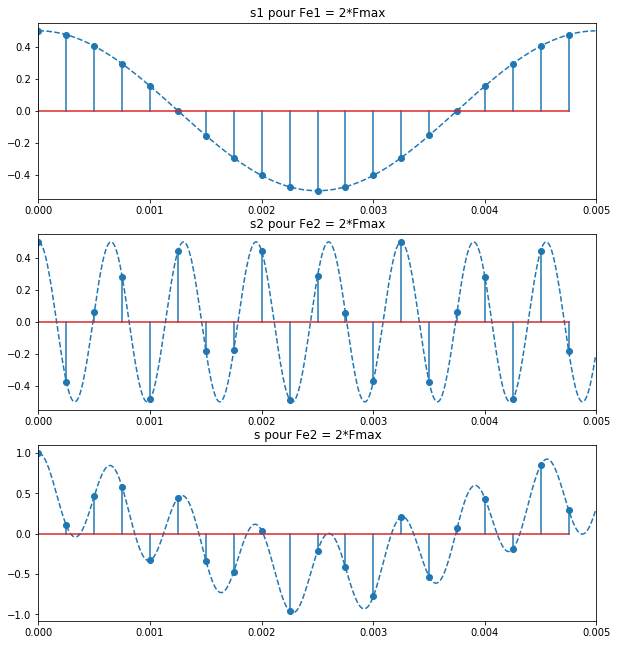

In [14]:
tmax = 0.005
ind  = np.where(t<tmax)       # pour extraire les indices des instants t<tmax 
ind_e  = np.where(te<tmax)    # pour extraire les indices des instants te<tmax

plt.figure(figsize = (10,11))  
plt.subplot(3,1,1)              
plt.plot(t[ind],s1[ind],'--')   # version interpol√©e continue
plt.stem(te[ind_e],s1e[ind_e])  # version √©chantillonn√©e
plt.xlim((0,0.005))
plt.title('s1 pour Fe1 = 2*Fmax')

plt.subplot(3,1,2)
plt.plot(t[ind],s2[ind],'--')   # version interpol√©e continue
plt.stem(te[ind_e],s2e[ind_e])  # version √©chantillonn√©e
plt.xlim((0,0.005))
plt.title('s2 pour Fe2 = 2*Fmax')

plt.subplot(3,1,3)
plt.plot(t[ind],s[ind],'--')   # version interpol√©e continue
plt.stem(te[ind_e],se[ind_e])  # version √©chantillonn√©e
plt.xlim((0,0.005))
plt.title('s pour Fe2 = 2*Fmax')

**Question :**
- Que constatez-vous ? Expliquez pourquoi.

On veut maintenant afficher le signal dans les domaines fr√©quenciel.

**Instruction :**
Pour cela, dans le fichier $utils.py$, impl√©mentez :

- une fonction $fourier\_transform$ qui prend comme entr√©es un signal et une fr√©quence d'√©chantillonnage et renvoie comme sortie sa transform√©e de Fourier centr√©e sur $0$, un vecteur des fr√©quences allant de $-\frac{Fe}{2}$ √† $\frac{Fe}{2}$ n√©cessaire √† cette transform√©e de Fourier. (Hint: utilisez le module fft de scipy)

- une fonction $fourier\_transform\_positif$ qui prend comme entr√©es un signal et une fr√©quence d'√©chantillonnage et renvoie comme sortie sa transform√©e de Fourier dans la partie fr√©quence positive entre $0$ et $Fe$, un vecteur des fr√©quences allant de $0$ √† $Fe$ n√©cessaire √† cette transform√©e de Fourier.

**Instruction :**
Illustrez la tranform√©e de Fourier du signal $s_{1e}$ :
- centr√©e sur 0 allant de $-\frac{Fe_1}{2}$ √† $\frac{Fe_1}{2}$
- entre 0 et $Fe_1$

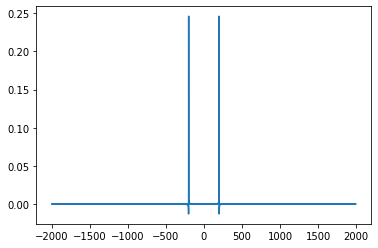

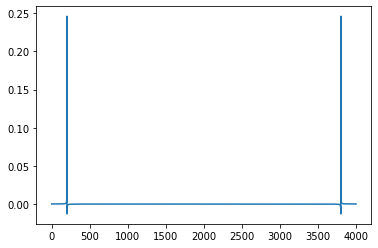

In [22]:
#Coder ici
xhat, freq = utils.fourier_transform(s1e, Fe1)
plt.plot(freq, np.real(xhat))
xhat, freq = utils.fourier_transform_positif(s1e, Fe1)
plt.figure()
plt.plot(freq, np.real(xhat))

**Question :**
- Que repr√©sentent les pics dans les graphiques? 
- Que repr√©sente le pic √† droite sur la graphique illustr√©e la transform√©e de Fourier dans la partie fr√©quence positive entre $0$ et $Fe$ ? Que faudrait-il ajouter au signal pour le faire dispara√Ætre ? tester.

**Instruction :**
Illustrez maintenent la tranform√©e de Fourier du signal $s_{e}$ centr√©e √† $0$

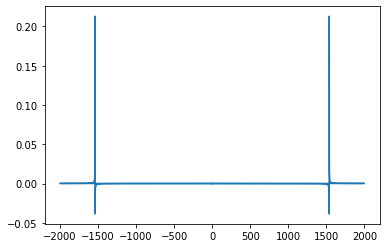

In [24]:
#Coder ici
xhat, freq = utils.fourier_transform(s2e, Fe1)
plt.plot(freq, np.real(xhat))

**Question :**
Que constatez-vous ? Expliquer.

### 0.2 Echantillonner avec aliasing (repliement)

On choisit maintenant d'utiliser la fr√©quence d'√©chantillonnage $Fe_2 = F_{max} = 2000$ Hz. On construit les nouvelles versions des signaux $s_1$, $s_2$ et $s$ √©chantillonn√©s √† cette fr√©quence.

In [25]:
Fe2   = Fmax                        # frequence d'echantillonnage Shannon
tbis  = np.linspace(0,T,num=Fe2*T)  # pour d√©finir une liste de Fe2*T √©chantillons de 0 √† T
s1ebis = 0.5*np.sin(2*np.pi*Fmax/10*tbis)        # valeurs de x1 aux instants t
s2ebis = 0.5*np.sin(2*np.pi*10*Fmax/13*tbis)     # valeurs de x2 aux instants t
sebis  = s1ebis + s2ebis

 **Instruction :** 
 - √âcoutez les signal √† la fr√©quence d'√©chantillonnage $Fe_2$ d√©finie ci-dessus.
 - Comparez avec les versions pr√©c√©dentes. Que constatez-vous ?

In [27]:
#Coder ici
Audio(s2ebis, rate=Fe2)

**Instruction :**
Illustrez maintenent la tranform√©e de Fourier du signal $s_{ebis}$ centr√©e √† $0$.


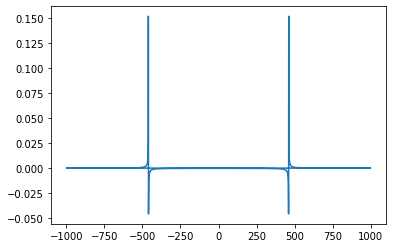

In [28]:
#Coder ici
xhat, freq = utils.fourier_transform(s2ebis, Fe2)
plt.plot(freq, np.real(xhat))


**Question :**
Que constatez-vous ? Expliquer pourquoi.

## Partie 1 : Fr√©quence d'√©chantillonnage √† l‚Äôacquisition ou √† la lecture

### Charger, √©couter, afficher un signal
Les signaux sonores sont des vecteurs 1D. 

Pour lire un signal : la fonction $load\_sound$ dans $utils.py$  mise √† votre disposition permet de charger
simplement un certain nombre de signaux.

La liste des signaux disponibles dans le dossier *audio* est: 
- bird.wav
- glockenspiel.wav 
- female.wav
- male.wav


In [ ]:
############## NE PAS MODIFIER #################
n = 2**15   # nombre d'√©chantillons                                      
################################################

**Instruction :** chargez les n=$2^{15}$ premiers √©chantillons du signal son "bird" en utilisant la fonction ùëôùëúùëéùëë_ùë†ùëúùë¢ùëõùëë

In [ ]:
# Coder ici


In [ ]:
############## NE PAS MODIFIER #################
Fe = 15000   # fr√©quence d'√©chantillonnage                                          
################################################

 **Instruction :** √âcoutez maintenant le signal √† la fr√©quence d'√©chantillonnage $Fe$ d√©finie ci-dessus.

In [ ]:
#Coder ici




**Questions :**
- √Ä quoi correspond le param√®tre $Fe$ ?
- Que se passe-t-il lorsqu‚Äôon diminue $Fe$ sans changer le signal ?



**Instruction :** √âcoutez le m√™me signal en diminuant la fr√©quence d'√©chantillonnage par 3 par exemple. Vous pouvez √©galement jouer en changeant le facteur de diminuation.


In [ ]:
#Coder ici
facteur = 3




**Question :**
- Que constatez-vous ? Expliquez pourquoi.

On veut maintenant afficher le signal dans les domaines temporel et fr√©quenciel.

**Instruction :**
Pour cela, dans le fichier $utils.py$, impl√©mentez :

- une fonction $define\_times$ qui prend comme entr√©es le nombre d'√©chantillons et la fr√©quence d'√©chantillonnage et renvoie comme sortie un vecteur de temps associ√©.

- une fonction $inverse\_fourier\_transform$ qui prend comme entr√©es la transform√©e de Fourier (centr√©e en 0) d'un signal et une fr√©quence √©chantillonn√©e et renvoie comme sortie le signal dans le domain de temps et un vecteur de temps associ√© √† cette repr√©sentation temporelle.

**Instruction :** 
Illustrez : avec une fr√©quence d'√©chantillonnage $Fe$ puis $Fe/3$

- Le signal charg√© (dans le domaine temporel) avec le temps associ√© (li√© √† la fr√©quence d'√©chantillonnage), 
- La transform√©e de Fourier centr√©e en 0 du signal √©chantillonn√©,
- La transform√©e de Fourier inverse. 


Faite le lien avec les observations de la question pr√©c√©dente.

In [ ]:
#Coder ici









**Question :**

Quelle manipulation proposez-vous sur le signal afin de corriger le ph√©nom√®ne observ√© tout en gardant la fr√©quence d'√©chantillonnage $Fe/3$?


In [ ]:
# Coder ici




## Partie 2 : Analyse par morceaux
**OBJECTIF** : calculer la transform√©e de Fourier de diff√©rents segments du signal autour de plusieurs instants $n_k$ et la repr√©senter en module pour mettre en √©vidence les variations du contenu fr√©quentiel du signal au cours du temps.
Pour cela, nous consid√©rons la transform√©e de Fourier du signal $s \times w$ o√π $w$ est fonction fen√™tre centr√©e sur $n_k$. 

### 2.1 Influence du type de fen√™tre

Nous analysons tout d'abord l'effet des deux fen√™tres suivantes : "porte" et "gaussienne". Pour rappel, le TF d'une porte est un sincardinal et le TF d'une fonction Gaussienne d√©finie par
$$ x(t) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-t^2 / (2\sigma^2)} $$
est donn√©e par
$$ \mathcal{F}x(f) = e^{-2\sigma^2\pi^2 f^2} $$

(Remarque: contrairement au cours, la transform√©e de Fourier est exprim√©e comme une fonction de la fr√©quence et non de la pulsation).



**Instruction** : Repr√©senter la TF d'un morceau du signal "bird" avec 
une largeur $L = 801$ √©chantillons centr√© sur $n_0=1000$.

- Tout d'abord, le morceau en utilisant une porte
- Ensuite le morceau en utilisant une gaussienne de $\sigma = 200$

In [ ]:
############## NE PAS MODIFIER ###############  
N = 400                                     ##
L=2*N+1                                     ##                                        
##############################################

In [ ]:
#Coder ici








**Questions :**
Que constatez-vous ? Expliquer pourquoi.

### 2.2 Influence de la largeur (dur√©e) de la fen√™tre
En gardant le m√™me nombre d'√©chantillons, afficher la fen√™tre gaussienne pour diff√©rentes valeurs de sigma (50, 100 ,200 et 250) ainsi qu'un exemple de segment de signal  pour une localisation fix√©e.



In [ ]:
# Coder ici 











**Question :**
Que constatez-vous ? Expliquer pourquoi.

### 2.3 Analyse par morceaux

**Instruction :**  Pour $\sigma=200$, √©crire une boucle **for** permettant de r√©p√©ter l'analyse ci-dessus pour des segments de signal autour de plusieurs instants nk, par exemple de $nk=200$ √† $nk=5000$ par pas de $200$. On repr√©sentera aussi tous ces spectres ensemble sur un seul et m√™me graphique. 

In [ ]:
# Coder ici 








**Question :**
Que remarquez-vous ? 

## Partie 3 :  Introduction √† l'analyse temps-fr√©quence

### 3.1 Transform√©e de Fourier √† fen√™tre : spectrogramme & reconstruction
Pour obtenir une repr√©sentation qui permette de suivre l'√©volution du contenu fr√©quentiel du signal au cours du temps, on d√©finit la notion de _transform√©e de Fourier √† fen√™tre_, ou _Short Term Fourier Transform_ en anglais. Cette transform√©e poss√®de $2$ indices, un pour l'instant sur lequel la fen√™tre est centr√©e et un pour les fr√©quences.

Sch√©matiquement, on obtient la TF √† fen√™tre en rassemblant dans une m√™me repr√©sentation les spectres calcul√©s sur des segments de signal successifs. L'int√©r√™t de cette repr√©sentation est de rassembler des transform√©es de Fourier locales (axe fr√©quentiel vertical) calcul√©es sur des fen√™tres temporelles r√©guli√®rement espac√©es (axe temporel horizontal) : en traduisant le carr√© de l'amplitude de cette TF √† fen√™tre par une √©chelle de couleur, on en d√©duit le **spectrogramme**. Le carr√© de l'amplitude de la transform√©e de Fourier √† fen√™tre s'interpr√®te comme une densit√© d'√©nergie temps-fr√©quence.

En g√©n√©ral, les fen√™tres se superposent en temps (overlap) ce qui entra√Æne une certaine redondance qui est aussi source d'une bonne lisibilit√© de l'information temps-fr√©quence. Cette repr√©sentation redondante peut s'inverser pour reconstruire le signal d'origine, on parle d'une _pseudo-inverse_.  On peut aussi montrer que l'√©nergie est conserv√©e, ce que nous illustrerons num√©riquement. 

Les param√®tres d'un spectrogramme sont le type de fen√™tre choisi, la taille de la fen√™tre  et le pas de temps entre 2 fen√™tres successives. 

Ici, la fonction **perform_stft** fournie avec le TP permet de calculer simplement la transform√©e de Fourier √† fen√™tre (dite aussi "√† court terme") d'un signal. 

La fonction **plot_spectrogram** fournit une repr√©sentation graphique dont l'axe vertical correspond aux fr√©quences (positives seules) √©chantillonn√©es entre $0$ et $Fe/2$ et l'axe horizontal aux √©chantillons temporels. 

Il faut noter que les transform√©es sont calcul√©es sur des intervalles de temps de largeur |width| espac√©s r√©guli√®rement  tous les |spacing| √©chantillons. 

Voici un exemple :

In [ ]:
from nt_toolbox.perform_stft import *
from nt_toolbox.plot_spectrogram import *

In [ ]:
############## NE PAS MODIFIER ###############
n = 1024*16  # nombre d'√©chantillons        ##
Fe = 15000   # Fr√©quence d'√©chantillonnage  ##
s = utils.load_sound("audio/bird.wav",n)    ##
##############################################

w = 128   #size of the window
q = w//4  #overlap of the window

S = perform_stft(s,w,q,n)
plt.figure(figsize = (15,20))
plot_spectrogram(S,"Spectrogramme de bird")
plt.show()

**Questions:** 
- Qu'obtenez-vous ? Expliquez en quelques phrases le spectrogramme obtenu.
Expliquer √† quoi correspondent les indices sur les axes horizontaux et verticaux du spectrogramme. 
- Comment doit-on les lire et les interpr√©ter (pr√©ciser les unit√©s de temps et de fr√©quence associ√©es).
- Essayez pour diff√©rentes valeurs de w (taille de fen√™tre) : 128 et 512. Que constatez-vous ?

### 3.2 L'introduction √† la s√©paration des sources
**OBJECTIF** : Nous avons deux sources de signal (ici les sons) qui se m√©langent (par exemple, enregistrement par un micro).
On obtient un signal observ√©e (signal m√©lang√©e).
A partir de ces donn√©es observ√©es, on essaie de retrouver les signaux de diff√©rentes sources au d√©part.

**Instruction** :
- Charger deux sources de son : "bird" et "glockenspiel".
- Normaliser pour que les amplitudes soient sur la m√™me √©chelle.
- M√©langer les deux sources par le simple op√©rateur addition, on s'appelle le signal m√©lang√© $y_{add}$ 
- Ecouter le signal m√©lang√© $y_{add}

In [ ]:
#Coder ici







**Analyse le signal m√©lang√© : $y_{add}$**
- Repr√©senter graphiquement le signal $y_{add}$ dans le temps puis son spectre (TF) **centr√© √† $0$**
- Repr√©senter √©galement son spectrogramme avec : 
  - la taille de la fen√™tre : w = 128
  - le pas de temps entre 2 fen√™tres : q = w//4  

In [ ]:
#Coder ici






**Question:** Que constatez-vous ? 

**S√©paration en utilisant des filtres** :
On veut ensuite r√©cup√©rer s√©par√©ment ces deux sources √† partir du signal m√©langer en utilisant les filtres f√©quentielles. Pour rappel, on a 4 types de filtres standards :
- Filtre passe-bas : https://fr.wikipedia.org/wiki/Filtre_passe-bas
- Filtre passe-haut : https://fr.wikipedia.org/wiki/Filtre_passe-haut
- Filtre passe-bande : https://fr.wikipedia.org/wiki/Filtre_passe-bande
- Filtre coupe-bande : https://fr.wikipedia.org/wiki/Filtre_coupe-bande


**Instruction** : dans le fichier $utils.py$, impl√©mentez ces 4 filtres:

- une fonction $low\_pass$ qui prend comme entr√©es un signal dans le domaine de fr√©quence, son vecteur de fr√©quence associ√©, une fr√©quence de coupure et renvoie comme sortie le signal filtr√© dans le domaine de fr√©quence.

- une fonction $hig\_pass$ qui prend comme entr√©es un signal dans le domaine de fr√©quence, son vecteur de fr√©quence associ√©, une fr√©quence de coupure et renvoie comme sortie le signal filtr√© dans le domaine de fr√©quence.

- une fonction $band\_pass$ qui prend comme entr√©es un signal dans le domaine de fr√©quence, son vecteur de fr√©quence associ√©, deux fr√©quences de coupure et renvoie comme sortie le signal filtr√© dans le domaine de fr√©quence.

- une fonction $band\_stop$ qui prend comme entr√©es un signal dans le domaine de fr√©quence, son vecteur de fr√©quence associ√©, deux fr√©quences de coupure et renvoie comme sortie le signal filtr√© dans le domaine de fr√©quence.

#### 3.2.1 Estimer premi√®re source (bird) :
**Instruction** : 
- Proposer une solution pour estimer la premi√®re source (r√©cupp√©rer le spectre de la premi√®re source)
- Repr√©senter (Dessiner) le spectre de la source estim√©e et le spectre de la vraie source

In [ ]:
#Coder ici






**Instruction :**  Donner le vecteur qui repr√©sente les amplitudes dans le temps de la source estim√©e. Puis l'√©couter.

In [ ]:
# Coder ici



**Instruction :**  √âcouter la vrai source  pour comparer.

In [ ]:
# Coder ici



**Instruction :** Dessiner **(dans le temps)** sur la m√™me figure la source initiale et la source estim√©e en utilisant un vecteur $t$ pour le temps.

In [ ]:
# Coder ici




**Instruction:** Repr√©senter √©galement leurs spectrogrammes avec : 
  - la taille de la fen√™tre : w = 256
  - le pas de temps entre 2 fen√™tres : q = w//8  

In [ ]:
#Coder ici 







#### 3.2.2 Estimer la seconde source : glockenspiel

Traiter avec les m√™mes questions de la partie 3.2.1

In [ ]:
#Coder ici



In [ ]:
#Coder ici



In [ ]:
#Coder ici



In [ ]:
#Coder ici



In [ ]:
#Coder ici

